___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers.
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


#Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information.
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones.
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations.
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


#Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words
- Create Word Cloud


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews.


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 50)

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

### Data Wrangling

In [4]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [5]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [6]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [7]:
df['Recommended IND'].value_counts()

1    19314
0     4172
Name: Recommended IND, dtype: int64

In [8]:
df.value_counts('Recommended IND', normalize=True)

Recommended IND
1    0.822362
0    0.177638
dtype: float64

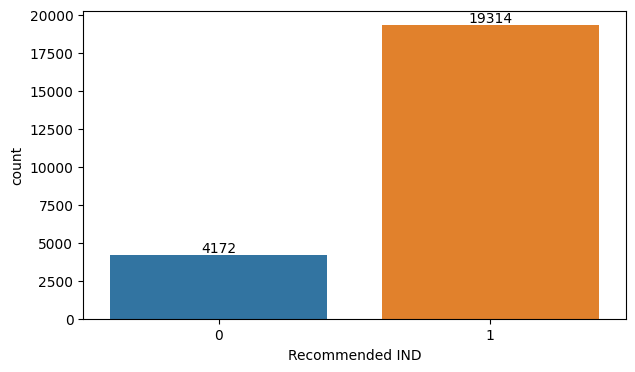

In [9]:
ax = sns.countplot(x="Recommended IND", data = df)
ax.bar_label(ax.containers[0]);

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [10]:
df_copy=df.drop(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Rating'
       ,'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'], axis=1)

In [11]:
df_copy.head()

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [12]:
pd.set_option('display.max_colwidth', None)

In [13]:
df_copy = df_copy.rename(columns={"Recommended IND": "target", "Review Text": "text"})

In [14]:
df_copy.head()

,text,target
0,Absolutely wonderful - silky and sexy and comfortable,1
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",1
2,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",0
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",1
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,1


### Missing Value Detection

In [15]:
df_copy.isna().sum()

text      845
target      0
dtype: int64

In [16]:
df_copy.dropna(inplace=True)

In [17]:
df_copy.duplicated().sum()

7

In [18]:
df_copy.drop_duplicates(inplace=True)

In [19]:
# Reset the index of the DataFrame.
df_copy.reset_index(drop=True, inplace=True)

In [20]:
df_copy.shape

(22634, 2)

In [21]:
df_copy.head()

,text,target
0,Absolutely wonderful - silky and sexy and comfortable,1
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",1
2,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",0
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",1
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,1


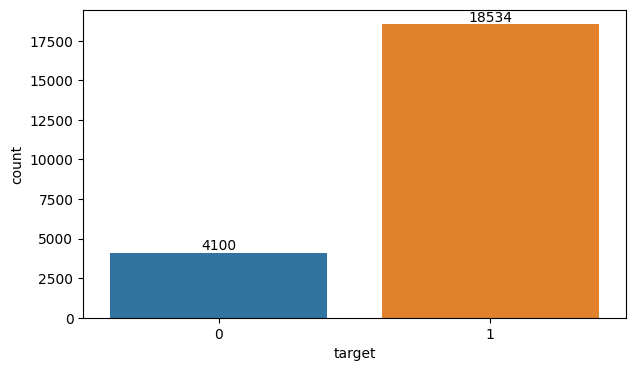

In [22]:
ax = sns.countplot(x="target", data = df_copy)
ax.bar_label(ax.containers[0]);

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma).
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method.


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [23]:
stop_words = set(stopwords.words('english'))

words_to_exclude = {"no", "not"}

stop_words.difference_update(words_to_exclude)

In [24]:
def cleaning(data):

    import re

    #1. Removing URLS
    data = re.sub('http\S*', '', data).strip()
    data = re.sub('www\S*', '', data).strip()

    #2. Removing Tags
    data = re.sub('#\S*', '', data).strip()

    #3. Removing Mentions
    data = re.sub('@\S*', '', data).strip()

    #4. Removing upper brackets to keep negative auxiliary verbs in text
    data = data.replace("'", "")

    #5. Tokenize
    text_tokens = word_tokenize(data.lower())

    #6. Remove Puncs and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]

    #7. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #8. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]


    #9. joining
    return " ".join( text_cleaned)

In [25]:
# cleaning_text = pd.DataFrame(df_copy["text"].apply(cleaning))

In [26]:
# df_copy['text'] = cleaning_text['text']

In [27]:
# df_copy.head()

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words
- Create Word Cloud


### Detect Reviews (positive and negative separately)

In [28]:
class_positive=df_copy[df_copy['target']==1]['text']
class_positive = class_positive.apply(cleaning)

In [29]:
class_negative=df_copy[df_copy['target']==0]['text']
class_negative = class_negative.apply(cleaning)

### Collect Words (positive and negative separately)

In [30]:
positive_w=" ".join(class_positive)

In [31]:
nigative_w=" ".join(class_negative)

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [32]:
from wordcloud import WordCloud

In [33]:
worldcloud_p= WordCloud(background_color="white", max_words =250,scale=3)

In [34]:
worldcloud_p.generate(positive_w)

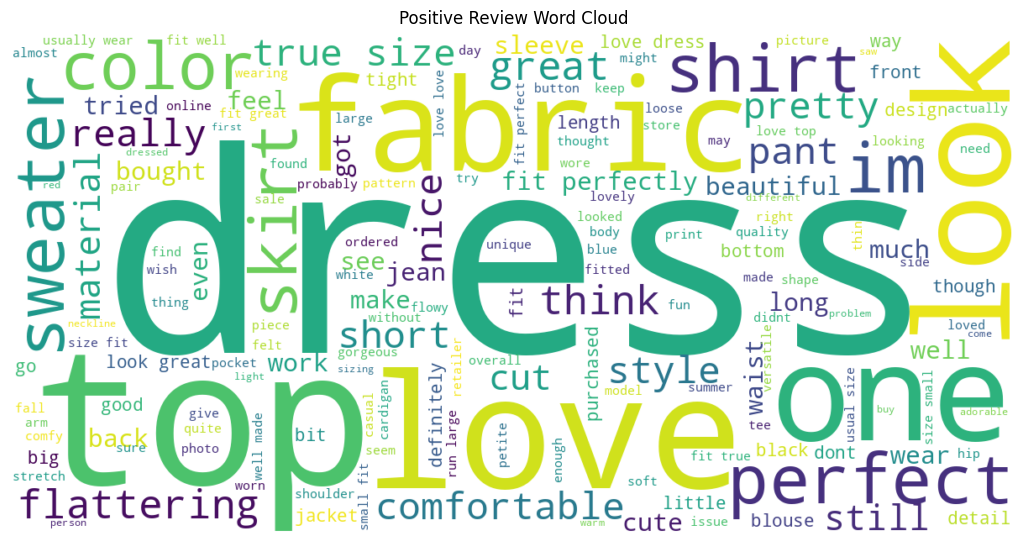

In [35]:
import matplotlib.pyplot as plt # The matplotlib library is used for visualization purposes
plt.figure(figsize = (13,13))
plt.imshow(worldcloud_p, interpolation="bilinear")
plt.title('Positive Review Word Cloud')
plt.axis("off")
plt.show()

In [36]:
worldcloud_n= WordCloud(background_color="white", max_words =250,scale=3)

In [37]:
worldcloud_n.generate(nigative_w)

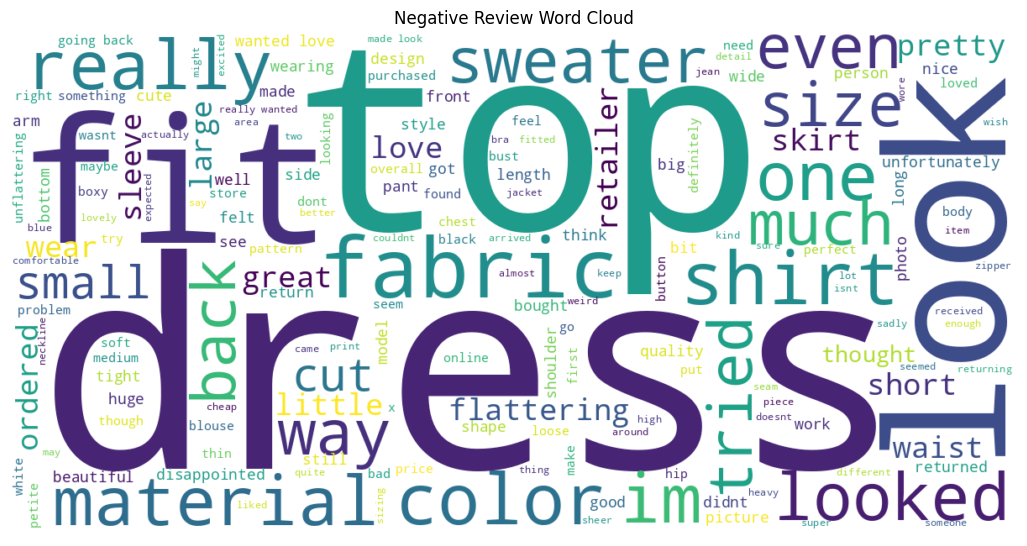

In [38]:
import matplotlib.pyplot as plt # The matplotlib library is used for visualization purposes
plt.figure(figsize = (13,13))
plt.imshow(worldcloud_n, interpolation="bilinear")
plt.title('Negative Review Word Cloud')
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.**

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X = df_copy["text"].values
y = df_copy["target"].map({0:1, 1:0}).values

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=101)

In [42]:
print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (20370,)
X_test Shape:  (2264,)
y_train Shape:  (20370,)
y_test Shape:  (2264,)


In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
vectorizer = CountVectorizer(preprocessor=cleaning,min_df=3,max_df=0.90)
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [45]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [46]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

,aa,ab,abby,abdomen,ability,able,abo,absolute,absolutely,absolutley,abstract,absurd,abt,abundance,ac,accent,accented,accentuate,accentuated,accentuates,accentuating,accept,acceptable,access,accessorize,...,yoga,yoke,york,youd,youll,young,younger,youre,youthful,youve,yr,yuck,yucky,yummy,zag,zero,zig,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20365,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
20366,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20367,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20368,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [48]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning,min_df=3,max_df=0.90)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [49]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [50]:
pd.DataFrame(X_train_tf_idf.toarray(),columns = tf_idf_vectorizer.get_feature_names_out())

,aa,ab,abby,abdomen,ability,able,abo,absolute,absolutely,absolutley,abstract,absurd,abt,abundance,ac,accent,accented,accentuate,accentuated,accentuates,accentuating,accept,acceptable,access,accessorize,...,yoga,yoke,york,youd,youll,young,younger,youre,youthful,youve,yr,yuck,yucky,yummy,zag,zero,zig,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.186525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.159929,0.0,0.0,0.0,0.0
20366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
20367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
20368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


### Eval Function

In [51]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score

In [52]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

## Logistic Regression

### CountVectorizer

In [53]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C = 0.02, max_iter=1000, class_weight='balanced',random_state=101)
log.fit(X_train_count,y_train)

LogisticRegression(C=0.02, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [54]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[1577  277]
 [  57  353]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.85      0.90      1854
           1       0.56      0.86      0.68       410

    accuracy                           0.85      2264
   macro avg       0.76      0.86      0.79      2264
weighted avg       0.89      0.85      0.86      2264

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.87      0.92     16680
           1       0.60      0.89      0.72      3690

    accuracy                           0.87     20370
   macro avg       0.79      0.88      0.82     20370
weighted avg       0.91      0.87      0.88     20370



In [55]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring= ["accuracy", "f1", "recall", "precision"]

# scoring = {'accuracy': make_scorer(accuracy_score),
#             'precision-neg': make_scorer(precision_score, average=None, labels=[0]),
#             'recall-neg': make_scorer(recall_score, average=None, labels = [0]),
#             'f1-neg': make_scorer(f1_score, average=None, labels = [0])}

model = LogisticRegression(C = 0.02, max_iter=1000, class_weight='balanced',random_state=101)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.858174
train_accuracy     0.872247
test_f1            0.683952
train_f1           0.717137
test_recall        0.846883
train_recall       0.893978
test_precision     0.573727
train_precision    0.598708
dtype: float64

In [56]:
pip install scikit-plot

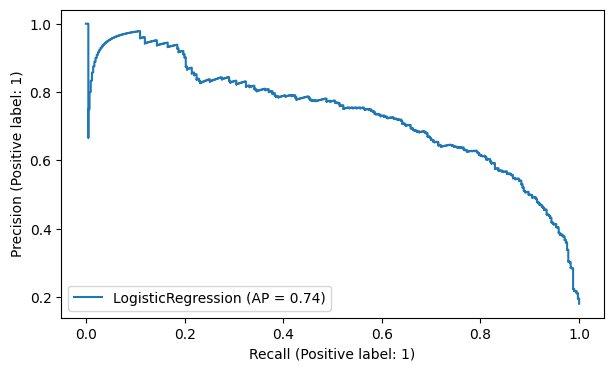

In [57]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

PrecisionRecallDisplay.from_estimator(log,X_test_count,y_test);

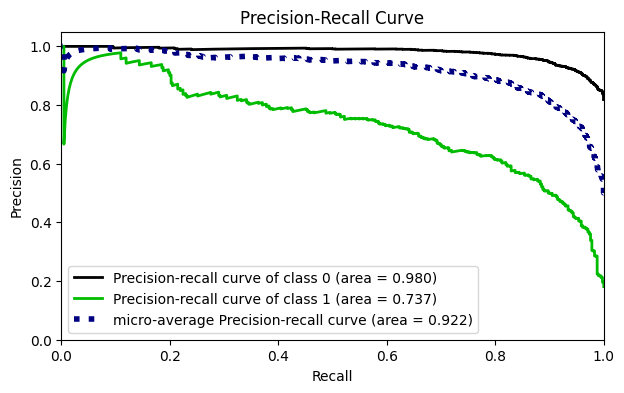

In [58]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = LogisticRegression(C = 0.02, max_iter=1000, class_weight="balanced",random_state=101)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [59]:
y_pred = log.predict(X_test_count)
y_pred_proba= log.predict_proba(X_test_count)[:,1]

log_count_rec_neg = recall_score(y_test, y_pred)
log_count_f1_neg = f1_score(y_test, y_pred)
log_AP_neg = average_precision_score(y_test, y_pred_proba)

### TF-IDF

In [60]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C=0.04, max_iter=1000, class_weight='balanced',random_state=101)
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.04, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [61]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL
[[1534  320]
 [  53  357]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.83      0.89      1854
           1       0.53      0.87      0.66       410

    accuracy                           0.84      2264
   macro avg       0.75      0.85      0.77      2264
weighted avg       0.89      0.84      0.85      2264

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.84      0.90     16680
           1       0.54      0.88      0.67      3690

    accuracy                           0.84     20370
   macro avg       0.76      0.86      0.79     20370
weighted avg       0.89      0.84      0.86     20370



In [62]:
model = LogisticRegression(C=0.04, max_iter=1000, class_weight='balanced',random_state=101)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.837604
train_accuracy     0.844641
test_f1            0.657194
train_f1           0.672418
test_recall        0.859350
train_recall       0.880217
test_precision     0.532105
train_precision    0.543996
dtype: float64

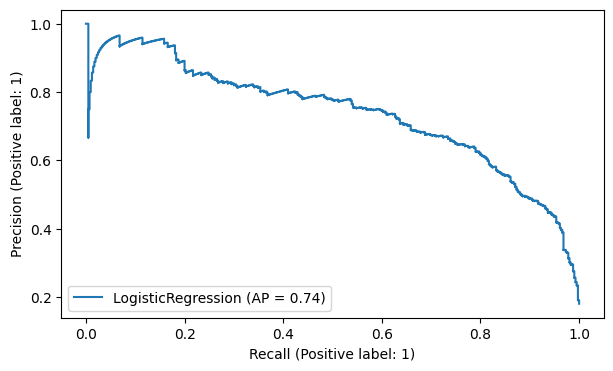

In [63]:
PrecisionRecallDisplay.from_estimator(log,X_test_tf_idf,y_test);

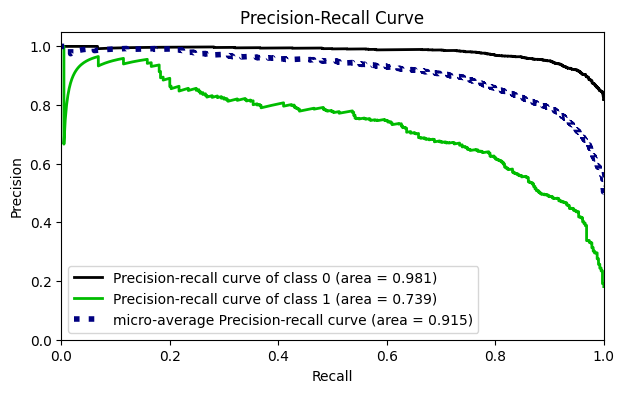

In [64]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = LogisticRegression(C=0.04, max_iter=1000, class_weight='balanced',random_state=101)

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [65]:
y_pred = log.predict(X_test_tf_idf)
y_pred_proba= log.predict_proba(X_test_tf_idf)[:,1]

log_tfidf_rec_neg = recall_score(y_test, y_pred)
log_tfidf_f1_neg = f1_score(y_test, y_pred)
log_tfidf_AP_neg = average_precision_score(y_test, y_pred_proba)

## Naive Bayes

### Countvectorizer

In [66]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = MultinomialNB(alpha=1.0)
nb.fit(X_train_count,y_train)

MultinomialNB()

In [67]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

NB MODEL
[[1686  168]
 [  86  324]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1854
           1       0.66      0.79      0.72       410

    accuracy                           0.89      2264
   macro avg       0.81      0.85      0.82      2264
weighted avg       0.90      0.89      0.89      2264

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     16680
           1       0.69      0.82      0.75      3690

    accuracy                           0.90     20370
   macro avg       0.82      0.87      0.84     20370
weighted avg       0.91      0.90      0.90     20370



In [68]:
model = MultinomialNB(alpha=1.0)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.882671
train_accuracy     0.902018
test_f1            0.701495
train_f1           0.751917
test_recall        0.760976
train_recall       0.819693
test_precision     0.650966
train_precision    0.694500
dtype: float64

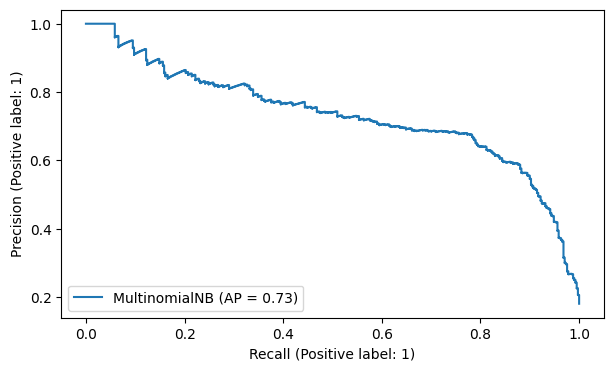

In [69]:
PrecisionRecallDisplay.from_estimator(nb,X_test_count,y_test);

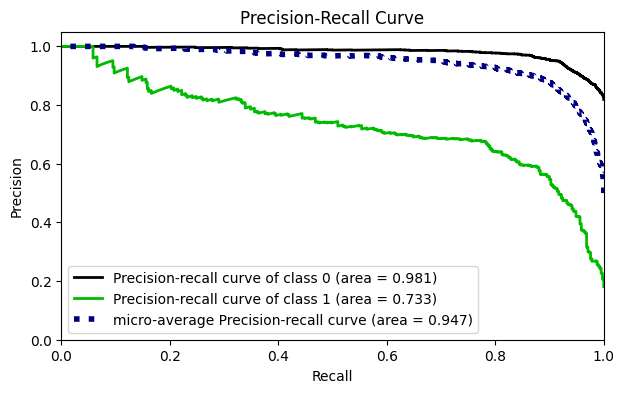

In [70]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = MultinomialNB(alpha=1.0)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [71]:
y_pred = nb.predict(X_test_count)
y_pred_proba= nb.predict_proba(X_test_count)[:,1]

nb_count_rec_neg = recall_score(y_test, y_pred)
nb_count_f1_neg = f1_score(y_test, y_pred)
nb_AP_neg = average_precision_score(y_test, y_pred_proba)

### TF-IDF

In [72]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = BernoulliNB(alpha=0.5)
nb.fit(X_train_tf_idf,y_train)

BernoulliNB(alpha=0.5)

In [73]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
[[1688  166]
 [ 100  310]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      1854
           1       0.65      0.76      0.70       410

    accuracy                           0.88      2264
   macro avg       0.80      0.83      0.81      2264
weighted avg       0.89      0.88      0.89      2264

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     16680
           1       0.69      0.82      0.75      3690

    accuracy                           0.90     20370
   macro avg       0.82      0.87      0.84     20370
weighted avg       0.91      0.90      0.90     20370



In [74]:
model = BernoulliNB(alpha=0.5)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.879381
train_accuracy     0.900971
test_f1            0.693834
train_f1           0.749942
test_recall        0.754201
train_recall       0.819753
test_precision     0.642918
train_precision    0.691094
dtype: float64

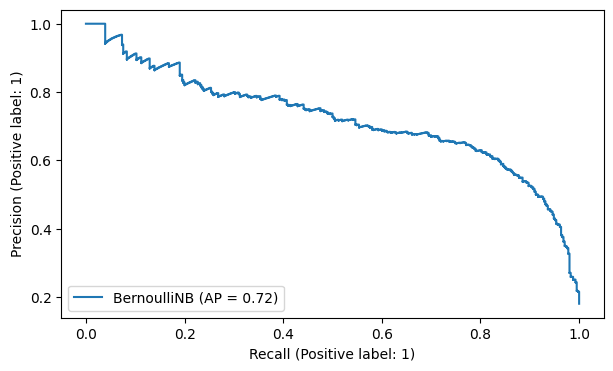

In [75]:
PrecisionRecallDisplay.from_estimator(nb,X_test_tf_idf,y_test);

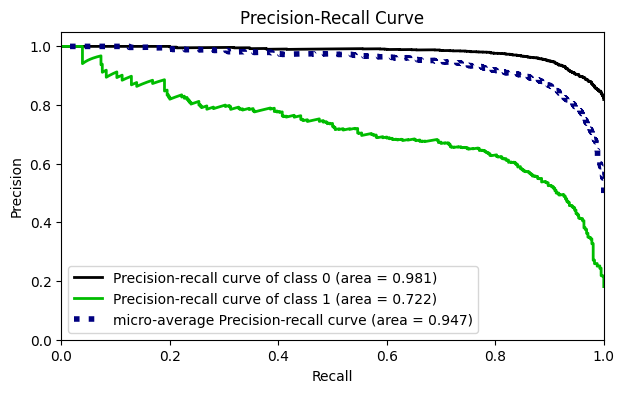

In [76]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = BernoulliNB(alpha=0.5)

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [77]:
y_pred = nb.predict(X_test_tf_idf)
y_pred_proba= nb.predict_proba(X_test_tf_idf)[:,1]

nb_tfidf_rec_neg = recall_score(y_test, y_pred)
nb_tfidf_f1_neg = f1_score(y_test, y_pred)
nb_tfidf_AP_neg = average_precision_score(y_test, y_pred_proba)

## Support Vector Machine (SVM)

### Countvectorizer

In [78]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.001,class_weight="balanced",random_state=101)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.001, class_weight='balanced', random_state=101)

In [79]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[1567  287]
 [  57  353]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      1854
           1       0.55      0.86      0.67       410

    accuracy                           0.85      2264
   macro avg       0.76      0.85      0.79      2264
weighted avg       0.89      0.85      0.86      2264

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     16680
           1       0.58      0.88      0.70      3690

    accuracy                           0.86     20370
   macro avg       0.78      0.87      0.81     20370
weighted avg       0.90      0.86      0.87     20370



In [80]:
model = LinearSVC(C=0.001,class_weight="balanced",random_state=101)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.850466
train_accuracy     0.861654
test_f1            0.673603
train_f1           0.698660
test_recall        0.851491
train_recall       0.885336
test_precision     0.557317
train_precision    0.577000
dtype: float64

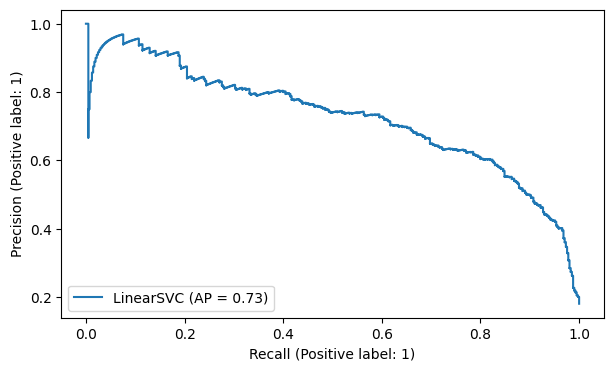

In [81]:
PrecisionRecallDisplay.from_estimator(svc,X_test_count,y_test);

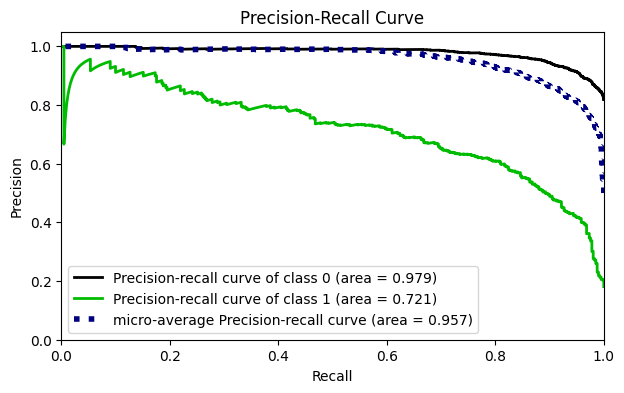

In [82]:
from scikitplot.metrics import plot_roc, plot_precision_recall
from sklearn.calibration import CalibratedClassifierCV

model = LinearSVC(C=0.001,class_weight="balanced",random_state=101)

# Create a CalibratedClassifierCV object
clf = CalibratedClassifierCV(model)

# Fit the CalibratedClassifierCV object to the training data
clf.fit(X_train_count, y_train)

# Get the predicted probabilities for the test data
y_proba = clf.predict_proba(X_test_count)

plot_precision_recall(y_test, y_proba)
plt.show();


In [83]:
y_pred = svc.predict(X_test_count)
decision_function= svc.decision_function(X_test_count)

svc_count_rec_neg = recall_score(y_test, y_pred)
svc_count_f1_neg = f1_score(y_test, y_pred)
svc_AP_neg = average_precision_score(y_test, decision_function)

### TD-IDF

In [84]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.03,class_weight="balanced",random_state=101)
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.03, class_weight='balanced', random_state=101)

In [85]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[1587  267]
 [  49  361]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1854
           1       0.57      0.88      0.70       410

    accuracy                           0.86      2264
   macro avg       0.77      0.87      0.80      2264
weighted avg       0.90      0.86      0.87      2264

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     16680
           1       0.60      0.91      0.72      3690

    accuracy                           0.87     20370
   macro avg       0.79      0.89      0.82     20370
weighted avg       0.91      0.87      0.88     20370



In [86]:
model = LinearSVC(C=0.03,class_weight="balanced",random_state=101)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.858763
train_accuracy     0.874238
test_f1            0.689410
train_f1           0.724466
test_recall        0.865312
train_recall       0.912677
test_precision     0.573047
train_precision    0.600613
dtype: float64

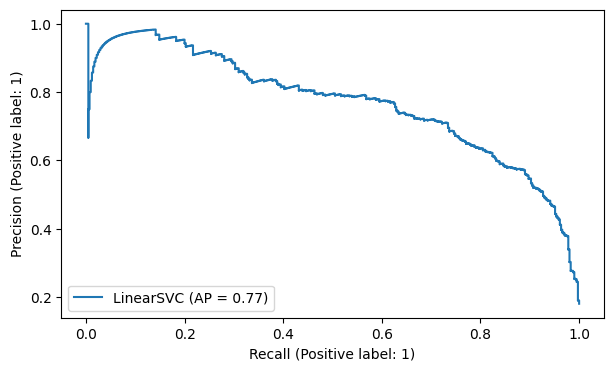

In [87]:
PrecisionRecallDisplay.from_estimator(svc,X_test_tf_idf,y_test);

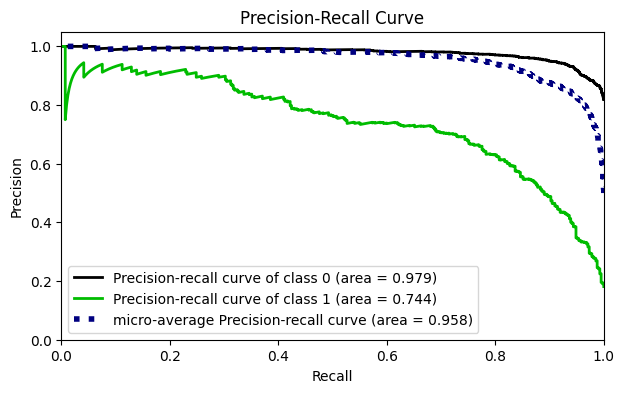

In [88]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = LinearSVC(C=0.03,class_weight="balanced",random_state=101)

# Create a CalibratedClassifierCV object
clf = CalibratedClassifierCV(model)

# Fit the CalibratedClassifierCV object to the training data
clf.fit(X_train_count, y_train)

# Get the predicted probabilities for the test data
y_proba = clf.predict_proba(X_test_count)

plot_precision_recall(y_test, y_proba)
plt.show();

In [89]:
y_pred = svc.predict(X_test_tf_idf)
decision_function= svc.decision_function(X_test_tf_idf)

svc_tfidf_rec_neg = recall_score(y_test, y_pred)
svc_tfidf_f1_neg = f1_score(y_test, y_pred)
svc_tfidf_AP_neg = average_precision_score(y_test, decision_function)

## Random Forest

### Countvectorizer

In [90]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(100, max_depth = 7, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, n_jobs=-1,
                       random_state=42)

In [91]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[1558  296]
 [  81  329]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      1854
           1       0.53      0.80      0.64       410

    accuracy                           0.83      2264
   macro avg       0.74      0.82      0.76      2264
weighted avg       0.87      0.83      0.85      2264

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.85      0.90     16680
           1       0.55      0.84      0.66      3690

    accuracy                           0.84     20370
   macro avg       0.75      0.84      0.78     20370
weighted avg       0.88      0.84      0.86     20370



In [92]:
model = RandomForestClassifier(100, max_depth = 7, random_state = 42, n_jobs = -1, class_weight="balanced")
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.822484
train_accuracy     0.843086
test_f1            0.620426
train_f1           0.663503
test_recall        0.800813
train_recall       0.853899
test_precision     0.506747
train_precision    0.542629
dtype: float64

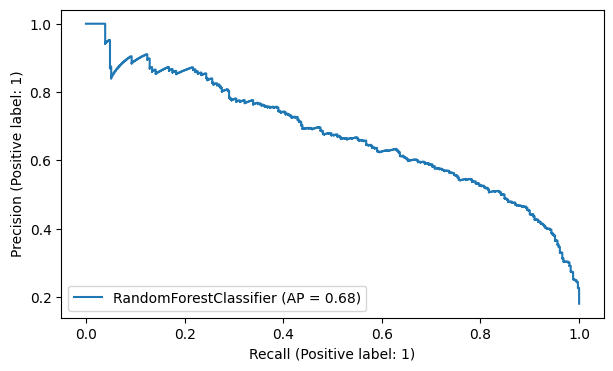

In [93]:
PrecisionRecallDisplay.from_estimator(rf,X_test_count,y_test);

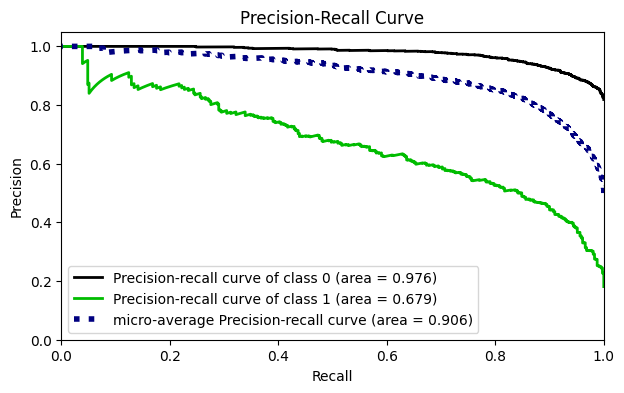

In [94]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = RandomForestClassifier(100, max_depth = 7, random_state = 42, n_jobs = -1, class_weight="balanced")

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [95]:
y_pred = rf.predict(X_test_count)
y_pred_proba= rf.predict_proba(X_test_count)[:,1]

rf_count_rec_neg = recall_score(y_test, y_pred)
rf_count_f1_neg = f1_score(y_test, y_pred)
rf_AP_neg = average_precision_score(y_test, y_pred_proba)

### TF-IDF

In [96]:
rf = RandomForestClassifier(100, max_depth=7, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, n_jobs=-1,
                       random_state=42)

In [97]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[1537  317]
 [  79  331]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.83      0.89      1854
           1       0.51      0.81      0.63       410

    accuracy                           0.83      2264
   macro avg       0.73      0.82      0.76      2264
weighted avg       0.87      0.83      0.84      2264

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.84      0.90     16680
           1       0.54      0.85      0.66      3690

    accuracy                           0.84     20370
   macro avg       0.75      0.85      0.78     20370
weighted avg       0.89      0.84      0.86     20370



In [98]:
model = RandomForestClassifier(100, max_depth=7, random_state = 42, n_jobs = -1, class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.816053
train_accuracy     0.839590
test_f1            0.613465
train_f1           0.662675
test_recall        0.805149
train_recall       0.869437
test_precision     0.495875
train_precision    0.535507
dtype: float64

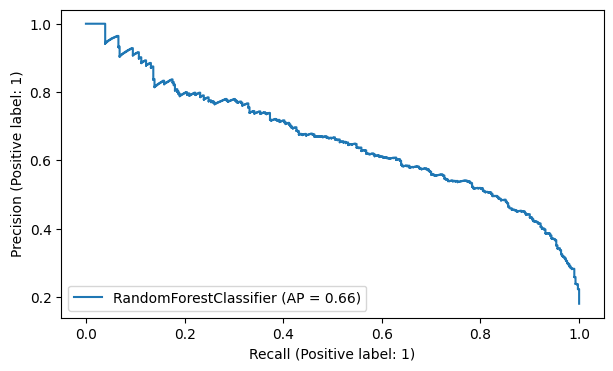

In [99]:
PrecisionRecallDisplay.from_estimator(rf, X_test_tf_idf, y_test);

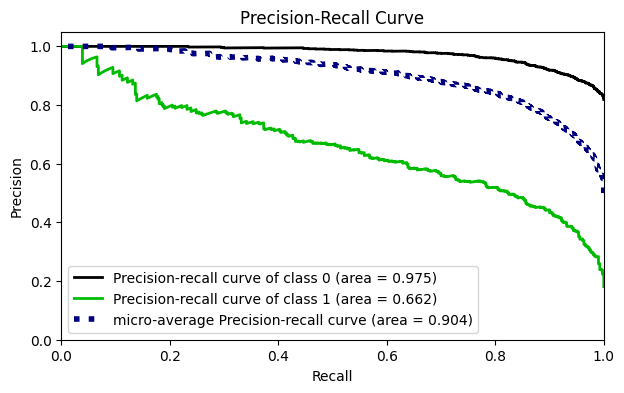

In [100]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = RandomForestClassifier(100, max_depth=7, random_state = 42, n_jobs = -1, class_weight="balanced")

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [101]:
y_pred = rf.predict(X_test_tf_idf)
y_pred_proba= rf.predict_proba(X_test_tf_idf)[:,1]

rf_tfidf_rec_neg = recall_score(y_test, y_pred)
rf_tfidf_f1_neg = f1_score(y_test, y_pred)
rf_tfidf_AP_neg = average_precision_score(y_test, y_pred_proba)

## Ada Boosting

### Countvectorizer

In [102]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 100, random_state = 42)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [103]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[1767   87]
 [ 205  205]]
Test_Set
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1854
           1       0.70      0.50      0.58       410

    accuracy                           0.87      2264
   macro avg       0.80      0.73      0.75      2264
weighted avg       0.86      0.87      0.86      2264

Train_Set
              precision    recall  f1-score   support

           0       0.90      0.95      0.93     16680
           1       0.72      0.52      0.60      3690

    accuracy                           0.88     20370
   macro avg       0.81      0.74      0.76     20370
weighted avg       0.87      0.88      0.87     20370



In [104]:
model = AdaBoostClassifier(n_estimators= 100, random_state = 42)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.869121
train_accuracy     0.876060
test_f1            0.578690
train_f1           0.602431
test_recall        0.496748
train_recall       0.518398
test_precision     0.694270
train_precision    0.719029
dtype: float64

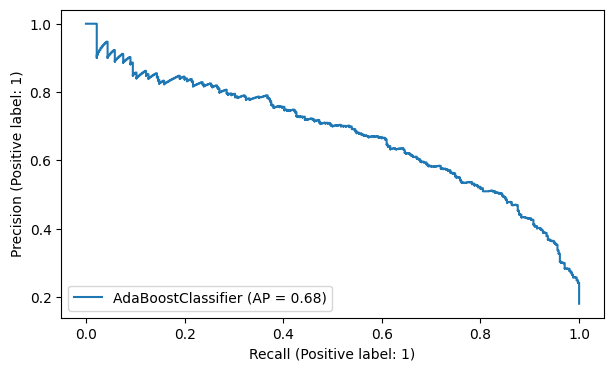

In [105]:
PrecisionRecallDisplay.from_estimator(ada,X_test_count, y_test);

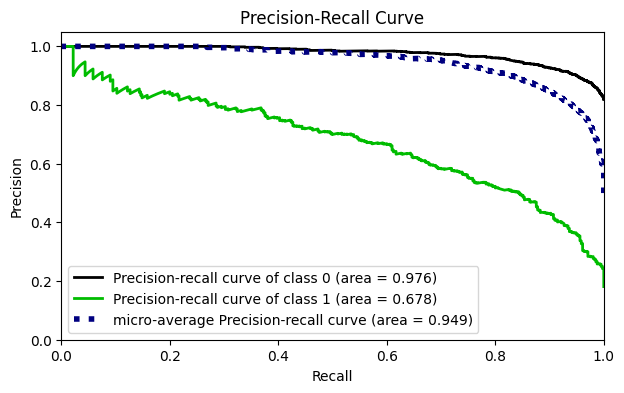

In [106]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = AdaBoostClassifier(n_estimators= 100, random_state = 42)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [107]:
y_pred = ada.predict(X_test_count)
y_pred_proba= ada.predict_proba(X_test_count)[:,1]

ada_count_rec_neg = recall_score(y_test, y_pred)
ada_count_f1_neg = f1_score(y_test, y_pred)
ada_AP_neg = average_precision_score(y_test, y_pred_proba)

### TF-IDF

In [108]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 100, random_state = 42,learning_rate=0.7)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(learning_rate=0.7, n_estimators=100, random_state=42)

In [109]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[1791   63]
 [ 230  180]]
Test_Set
              precision    recall  f1-score   support

           0       0.89      0.97      0.92      1854
           1       0.74      0.44      0.55       410

    accuracy                           0.87      2264
   macro avg       0.81      0.70      0.74      2264
weighted avg       0.86      0.87      0.86      2264

Train_Set
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     16680
           1       0.76      0.46      0.57      3690

    accuracy                           0.88     20370
   macro avg       0.82      0.71      0.75     20370
weighted avg       0.87      0.88      0.86     20370



In [110]:
model = AdaBoostClassifier(n_estimators= 100, random_state = 42,learning_rate=0.7)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.867158
train_accuracy     0.877996
test_f1            0.541128
train_f1           0.581909
test_recall        0.432791
train_recall       0.468714
test_precision     0.723301
train_precision    0.767215
dtype: float64

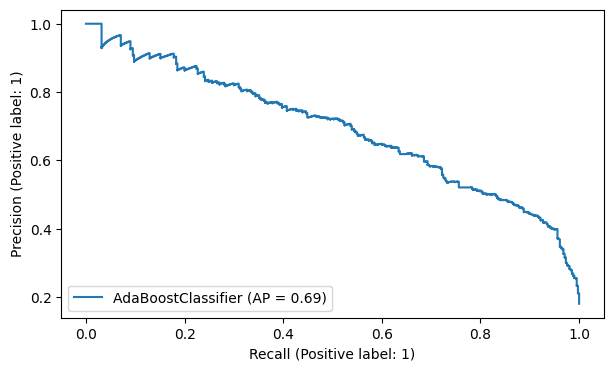

In [111]:
PrecisionRecallDisplay.from_estimator(ada,X_test_tf_idf,y_test);

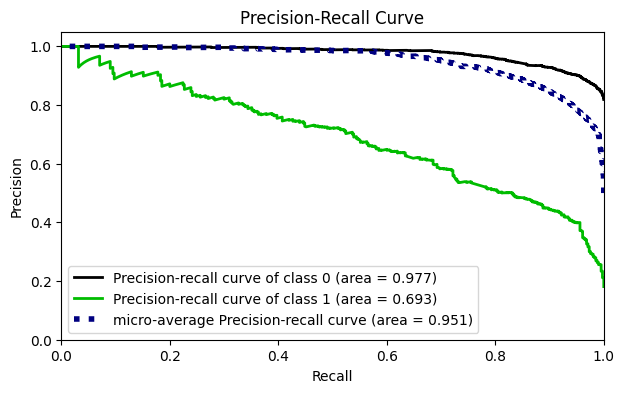

In [112]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = AdaBoostClassifier(n_estimators= 100, random_state = 42,learning_rate=0.7)

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [113]:
y_pred = ada.predict(X_test_tf_idf)
y_pred_proba= ada.predict_proba(X_test_tf_idf)[:,1]

ada_tfidf_rec_neg = recall_score(y_test, y_pred)
ada_tfidf_f1_neg = f1_score(y_test, y_pred)
ada_tfidf_AP_neg = average_precision_score(y_test, y_pred_proba)

## DL modeling

In [114]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Tokenization

In [115]:
from collections import Counter

# Count the number of times each word appears in the text
word_counts = Counter(df_copy.text)

# Convert the word counts to a list
word_counts_list = word_counts.most_common()

# Select the most frequent words to include in the vocabulary
vocab = word_counts_list[:20000]

# Add the unknown word token
vocab.append('<unk>')

num_words=len(vocab)

# Create a tokenizer with the vocabulary
tokenizer = Tokenizer(num_words=num_words)

In [116]:
# tokenizer = Tokenizer(num_words=num_words, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890' )

In [117]:
tokenizer.fit_on_texts(X)

### Creating word index

In [118]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'was': 15,
 'so': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'fit': 26,
 'are': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'me': 31,
 'wear': 32,
 "it's": 33,
 'great': 34,
 'too': 35,
 "i'm": 36,
 'or': 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'would': 41,
 'they': 42,
 'up': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'if': 49,
 'more': 50,
 'really': 51,
 'ordered': 52,
 'little': 53,
 'perfect': 54,
 'will': 55,
 'one': 56,
 'these': 57,
 'flattering': 58,
 'well': 59,
 'an': 60,
 'soft': 61,
 'out': 62,
 'back': 63,
 'because': 64,
 'had': 65,
 'can': 66,
 '\r': 67,
 'comfortable': 68,
 'cute': 69,
 'nice': 70,
 'than': 71,
 'bought': 72,
 'beautiful': 73,
 'when': 74,
 'all': 75,
 'looks': 76,
 'bit': 77,
 'fits': 78,
 'large': 79,

In [119]:
len(tokenizer.word_index)

14847

### Converting tokens to numeric

In [120]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [121]:
X[:2]

array(['Absolutely wonderful - silky and sexy and comfortable',
       'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.'],
      dtype=object)

In [122]:
X_num_tokens[:2]

[[253, 532, 917, 3, 662, 3, 68],
 [21,
  7,
  18,
  33,
  1712,
  99,
  2,
  1321,
  8,
  221,
  5,
  9,
  4,
  106,
  3,
  36,
  314,
  2,
  131,
  1243,
  2,
  429,
  41,
  24,
  52,
  5,
  136,
  1243,
  33,
  95,
  2,
  72,
  4,
  95,
  3,
  38,
  501,
  2,
  21,
  1,
  86,
  11,
  31,
  416,
  39,
  4,
  53,
  453,
  1,
  392,
  41,
  155,
  29,
  4,
  130,
  1372,
  11,
  438,
  439,
  6,
  772,
  95]]

### Maximum number of tokens for all documents¶

In [123]:
num_tokens = [len(sen_tokens) for sen_tokens in X_num_tokens]
num_tokens = np.array(num_tokens)
num_tokens

array([ 7, 62, 97, ..., 42, 85, 19])

In [124]:
num_tokens.mean()

60.60934876734117

In [125]:
num_tokens.max()

116

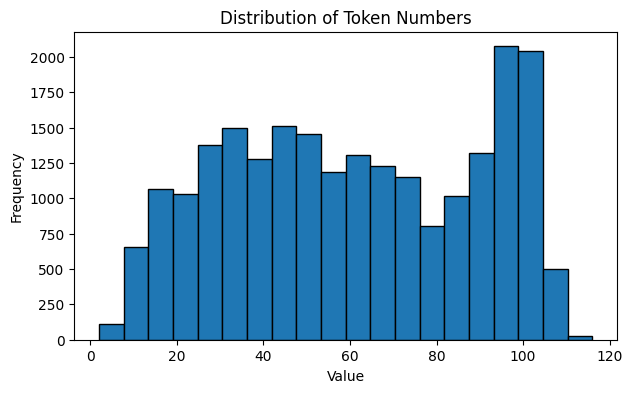

In [126]:
# Plot a histogram to visualize the distribution
plt.hist(num_tokens, bins=20, edgecolor='black')  # Adjust the number of bins as needed
plt.title("Distribution of Token Numbers")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [127]:
max_tokens = 59

In [128]:
sum(num_tokens <= max_tokens) / len(num_tokens)

0.5029159671290978

In [129]:
sum(num_tokens <= max_tokens)

11383

In [130]:
len(num_tokens)

22634

### Fixing token counts of all documents (pad_sequences)

In [131]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens, padding="pre")
X_pad.shape

(22634, 59)

In [132]:
np.argmax(num_tokens)

16258

In [133]:
np.array(X_num_tokens[11955])

array([   2,  346,    7,   80,   16,   84,    2,   52,    4,  623,   56,
        136,    9,    1,  318,   22,   10,  244,   47,  302,    1,  623,
         56,    6,   84,  317,   71,    1,  171,    3,   76,  534,   28,
          4,  388,   37,   50,   28,    4,  554,  303,   25,   19,    4,
        111,   48,   16,    1,  623,   56,    6,  176,   63,  471,    1,
         80,   41,  115,  265,  863, 1098,   59,  128,   61,    3,  242,
          3,   76,   34,   14,   75, 4594,   13,  764,   92, 1293,  268,
        228,    5,  364,    9,   50,   93,    2,  423,   32,    4,  249,
         37,  394,    9,  103,  218,    3,  396,    1,  394,    9, 1055])

In [134]:
X_pad[11955]

array([ 303,   25,   19,    4,  111,   48,   16,    1,  623,   56,    6,
        176,   63,  471,    1,   80,   41,  115,  265,  863, 1098,   59,
        128,   61,    3,  242,    3,   76,   34,   14,   75, 4594,   13,
        764,   92, 1293,  268,  228,    5,  364,    9,   50,   93,    2,
        423,   32,    4,  249,   37,  394,    9,  103,  218,    3,  396,
          1,  394,    9, 1055], dtype=int32)

### Train Set Split

In [135]:
X_train, X_test, y_train, y_test = train_test_split( X_pad, y, test_size=0.1, random_state=101, stratify=y)

In [136]:
print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (20370, 59)
X_test Shape:  (2264, 59)
y_train Shape:  (20370,)
y_test Shape:  (2264,)


### Modeling

In [137]:
model = Sequential()

embedding_size = 50

model.add(Embedding(input_dim=num_words,output_dim=embedding_size,input_length=max_tokens))
model.add(Dropout(0.2))

model.add(GRU(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=25, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=12, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

In [138]:
optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['Recall'])

In [139]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 59, 50)            1000050   
                                                                 
 dropout (Dropout)           (None, 59, 50)            0         
                                                                 
 gru (GRU)                   (None, 59, 50)            15300     
                                                                 
 dropout_1 (Dropout)         (None, 59, 50)            0         
                                                                 
 gru_1 (GRU)                 (None, 59, 25)            5775      
                                                                 
 dropout_2 (Dropout)         (None, 59, 25)            0         
                                                                 
 gru_2 (GRU)                 (None, 12)                1

In [140]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall", mode="max", verbose=1,patience = 2, restore_best_weights=True)

In [141]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced',y=y_train)
pd.Series(classes_weights).unique()

array([0.61061151, 2.7601626 ])

In [142]:
model.fit(X_train, y_train, epochs=10, batch_size=128, sample_weight=classes_weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/10
160/160 [==============================] - 42s 202ms/step - loss: 0.5139 - recall: 0.7108 - val_loss: 0.3877 - val_recall: 0.8683
Epoch 2/10
160/160 [==============================] - 32s 200ms/step - loss: 0.3174 - recall: 0.8954 - val_loss: 0.3732 - val_recall: 0.8561
Epoch 3/10
160/160 [==============================] - 34s 210ms/step - loss: 0.2563 - recall: 0.9298 - val_loss: 0.3113 - val_recall: 0.7585
Epoch 3: early stopping


### Model Evaluation

In [143]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.513876,0.710840,0.387693,0.868293
1,0.317420,0.895393,0.373188,0.856098
2,0.256272,0.929810,0.311293,0.758537


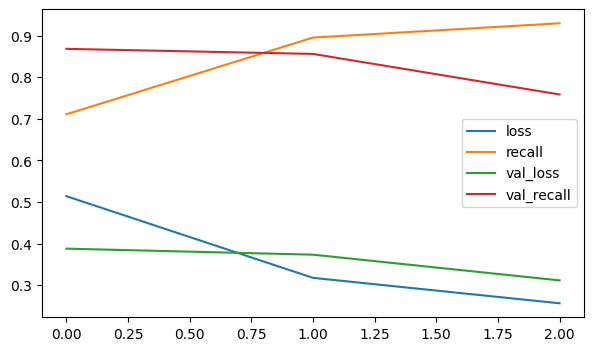

In [144]:
model_loss.plot();

In [145]:
model.evaluate(X_test, y_test)

71/71 [==============================] - 1s 21ms/step - loss: 0.3877 - recall: 0.8683


[0.38769346475601196, 0.8682926893234253]

In [146]:
model.evaluate(X_train, y_train)

637/637 [==============================] - 16s 26ms/step - loss: 0.3314 - recall: 0.9244


[0.33138740062713623, 0.9243902564048767]

In [147]:
y_pred = (model.predict(X_test)>= 0.5).astype("int32")

71/71 [==============================] - 3s 21ms/step


In [148]:
y_prediction =  [np.argmax(i) for i in y_pred]
y_prediction[:3]

[0, 0, 0]

In [149]:
y_test_new = [np.argmax(i) for i in y_test]
y_test_new [:3]

[0, 0, 0]

In [150]:
my_dict = {
    "Actual": y_test,
    "Pred": y_pred.reshape(-1,),
}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
1542,0,0
2174,0,0
740,0,0
695,0,0
1830,0,0
1154,1,1
1951,0,0
1058,0,0
343,0,1
836,0,1


In [151]:
from sklearn.metrics import classification_report, confusion_matrix
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train) >= 0.5
    y_pred = model.predict(X_test) >= 0.5
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [152]:
eval_metric(model, X_train, y_train, X_test, y_test)

71/71 [==============================] - 1s 21ms/step
Test_Set
[[1513  341]
 [  54  356]]
              precision    recall  f1-score   support

           0       0.97      0.82      0.88      1854
           1       0.51      0.87      0.64       410

    accuracy                           0.83      2264
   macro avg       0.74      0.84      0.76      2264
weighted avg       0.88      0.83      0.84      2264


Train_Set
[[14071  2609]
 [  279  3411]]
              precision    recall  f1-score   support

           0       0.98      0.84      0.91     16680
           1       0.57      0.92      0.70      3690

    accuracy                           0.86     20370
   macro avg       0.77      0.88      0.80     20370
weighted avg       0.91      0.86      0.87     20370



71/71 [==============================] - 2s 21ms/step


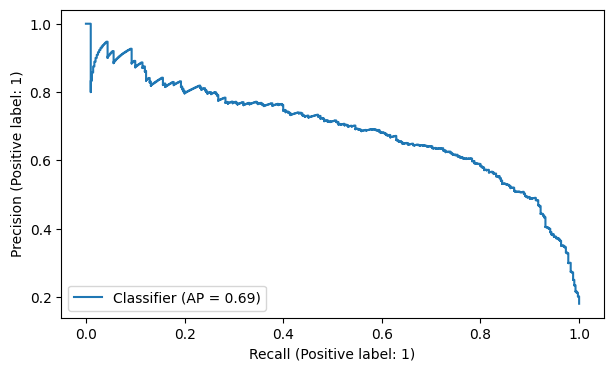

In [153]:
from sklearn.metrics import PrecisionRecallDisplay

y_pred_proba = model.predict(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)

In [154]:
DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)

## BERT Modeling

In [196]:
pip install transformers

### Tokenization

In [197]:
X

array(['Absolutely wonderful - silky and sexy and comfortable',
       'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.',
       'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c',
       ...,
       "This fit well, but the top was very see through. this never would have worked for me. i

In [198]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

In [199]:
tokenizer.vocab

{'bird': 5285,
 '##ld': 5253,
 'transfers': 16845,
 'Dyer': 27028,
 'cared': 8361,
 'upgrade': 12764,
 'grabbed': 3182,
 'elephants': 20724,
 'restored': 5219,
 '##chism': 25564,
 'William': 1613,
 '##glia': 22812,
 'fingers': 2220,
 '##AM': 10964,
 'observe': 12326,
 'detention': 13826,
 'Majority': 23670,
 'newly': 3599,
 'cell': 2765,
 'function': 3053,
 '##Ա': 28423,
 '##BM': 27616,
 'Theresa': 15532,
 'vehicle': 3686,
 'Edna': 23273,
 'shifted': 4707,
 'Northumberland': 17206,
 '##gnetic': 19975,
 '##alan': 24240,
 '##flower': 15055,
 'crosses': 7566,
 'classrooms': 13038,
 '##ulet': 20117,
 '##ine': 2042,
 '##ÿ': 28211,
 'outcome': 9386,
 'Slayer': 25642,
 'harmony': 12659,
 'Spider': 8454,
 'Percussion': 22599,
 '##ₜ': 28729,
 'casting': 9616,
 '##pling': 11624,
 'Sweden': 3865,
 'Katherine': 9179,
 'ye': 6798,
 '##BC': 9428,
 'Above': 12855,
 'Disco': 22314,
 'serpent': 26534,
 'monitors': 16884,
 '##berto': 26831,
 '##eron': 28032,
 'sessions': 6887,
 'pill': 21822,
 'Price': 

In [200]:
print(len(tokenizer.vocab))

28996


### Fixing token counts of all documents

In [201]:
# For every sentence...
num_of_sent_tokens = []
for sent in X:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.

    input_ids = tokenizer.encode(sent,add_special_tokens=True)
    num_of_sent_tokens.append(len(input_ids))

print('Max sentence length: ', max(num_of_sent_tokens))

Max sentence length:  164


In [202]:
np.array(num_of_sent_tokens).mean()

78.02482990191747

In [203]:
token_size = 162
sum(np.array(num_of_sent_tokens) <= token_size) / len(num_of_sent_tokens)

0.9999558186798622

### Train test split

In [204]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y,test_size=0.1,stratify=y,random_state=101)

In [205]:
print("X_train Shape: ",X_train2.shape)
print("X_test Shape: ",X_test2.shape)
print("y_train Shape: ",y_train2.shape)
print("y_test Shape: ",y_test2.shape)

X_train Shape:  (20370,)
X_test Shape:  (2264,)
y_train Shape:  (20370,)
y_test Shape:  (2264,)


### Transformation Vectors to Matrices

In [206]:
all_sentence_tokens = tokenizer(list(X),max_length=162,truncation=True,padding='max_length',add_special_tokens=True)

In [207]:
np.array(all_sentence_tokens['input_ids'])

array([[  101, 24107,  7310, ...,     0,     0,     0],
       [  101,  2185,  1142, ...,     0,     0,     0],
       [  101,   146,  1125, ...,     0,     0,     0],
       ...,
       [  101,  1188,  4218, ...,     0,     0,     0],
       [  101,   146,  3306, ...,     0,     0,     0],
       [  101,  1188,  3642, ...,     0,     0,     0]])

In [208]:
np.array(all_sentence_tokens['attention_mask'])

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [209]:
def transformation(X):
  # set array dimensions
  seq_len = 162

  all_sentence_tokens = tokenizer(list(X),
                                  max_length=seq_len,
                                  truncation=True,
                                  padding='max_length',
                                  add_special_tokens=True)

  return np.array(all_sentence_tokens['input_ids']), np.array(all_sentence_tokens['attention_mask'])

In [210]:
Xids_train, Xmask_train = transformation(X_train2)

Xids_test, Xmask_test = transformation(X_test2)

In [211]:
print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)

Xids_train.shape  : (20370, 162)
Xmask_train.shape : (20370, 162)
Xids_test.shape   : (2264, 162)
Xmask_test.shape  : (2264, 162)


In [212]:
labels_train = y_train2.reshape(-1,1)
labels_train

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [213]:
labels_test = y_test2.reshape(-1,1)
labels_test

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

### Transformation Matrix to Tensorflow tensor

In [214]:
import tensorflow as tf

dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train, Xmask_train, y_train))
dataset_train

<_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [215]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test, Xmask_test, y_test))
dataset_test

<_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [216]:
def map_func(Tensor_Xids, Tensor_Xmask, Tensor_labels):
    return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}, Tensor_labels

In [217]:
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func)

In [218]:
dataset_train

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.int64, name=None)}, TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [219]:
dataset_test

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.int64, name=None)}, TensorSpec(shape=(), dtype=tf.int64, name=None))>

### Batch Size

In [220]:
batch_size = 32

train_ds = dataset_train.batch(batch_size)
val_ds = dataset_test.batch(batch_size)

In [221]:
train_ds

<_BatchDataset element_spec=({'input_ids': TensorSpec(shape=(None, 162), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(None, 162), dtype=tf.int64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [222]:
len(X_train)

20370

In [223]:
len(X_train)/32

636.5625

In [224]:
print(len(train_ds))
print(len(train_ds)*3)
print(int(0.1*len(train_ds)*3))

637
1911
191


### Creating optimization

In [225]:
pip install -q tf-models-official

In [226]:
from official.nlp import optimization
epochs = 3

steps_per_epoch = len(train_ds)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5
optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')


In [227]:
print(len(train_ds)*3)
print(int(0.1*len(train_ds)*3))

1911
191


### Creating Model with TPU

In [228]:
def create_model():
    from transformers import TFAutoModel #TFBertModel
    from tensorflow.keras.layers import Input, Dropout, Dense, BatchNormalization
    from tensorflow.keras import Model

    model = TFAutoModel.from_pretrained("bert-base-uncased")

    input_ids = Input(shape=(162,), name='input_ids', dtype='int32')
    attention_mask = Input(shape=(162,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]

    x = Dense(80, activation='relu')(embeddings)
    x = BatchNormalization()(x)
    x = Dropout(0.1, name="dropout")(x) #0.1
    y = Dense(1, activation='sigmoid', name='outputs')(x)

    return Model(inputs=[input_ids, attention_mask], outputs=y)

In [229]:
import os

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [230]:
strategy = tf.distribute.TPUStrategy(resolver)

In [231]:
with strategy.scope():

  optimizer = optimizer
  loss = 'binary_crossentropy'
  recall = 'Recall'
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss=loss, metrics=[recall])

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [232]:
pd.Series(y).value_counts(normalize=True)

0    0.818857
1    0.181143
dtype: float64

In [233]:
weights = {0:0.18, 1:0.81}

In [234]:
model3.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 162)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 162)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 162,                                         

### Model Fiting

In [235]:
model3.fit(train_ds, validation_data= val_ds, epochs=epochs, class_weight=weights)

Epoch 1/3
637/637 [==============================] - 218s 197ms/step - loss: 0.1754 - recall: 0.7675 - val_loss: 0.7985 - val_recall: 0.9805
Epoch 2/3
637/637 [==============================] - 68s 106ms/step - loss: 0.1391 - recall: 0.8732 - val_loss: 0.5783 - val_recall: 0.9293
Epoch 3/3
637/637 [==============================] - 68s 107ms/step - loss: 0.1231 - recall: 0.9033 - val_loss: 0.4587 - val_recall: 0.8805


### Model evaluation

In [236]:
model_loss = pd.DataFrame(model3.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.175404,0.767480,0.798467,0.980488
1,0.139070,0.873171,0.578333,0.929268
2,0.123103,0.903252,0.458692,0.880488


<Axes: >

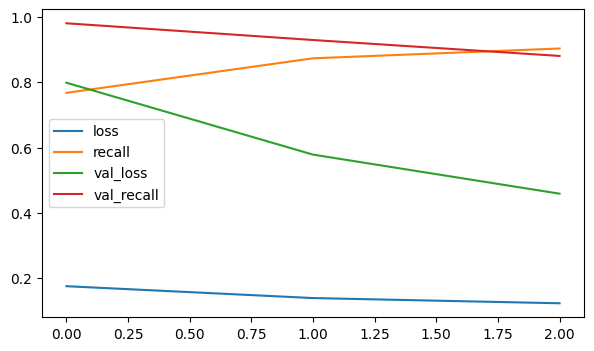

In [237]:
model_loss.plot()

In [238]:
model3.evaluate(train_ds)

637/637 [==============================] - 26s 38ms/step - loss: 0.3760 - recall: 0.9453


[0.37603920698165894, 0.9452574253082275]

In [239]:
model3.evaluate(val_ds)

71/71 [==============================] - 4s 35ms/step - loss: 0.4587 - recall: 0.8805


[0.45869165658950806, 0.8804877996444702]

In [240]:
y_pred = model3.predict(val_ds)>= 0.5

71/71 [==============================] - 17s 163ms/step


In [241]:
y_prediction =  [np.argmax(i) for i in y_pred]
y_prediction[:3]

[0, 0, 0]

In [242]:
y_pred_train = model3.predict(train_ds)

637/637 [==============================] - 19s 28ms/step


In [243]:
y_prediction_train =  [np.argmax(i) for i in y_pred_train]
y_prediction_train[:3]

[0, 0, 0]

In [244]:
from sklearn.metrics import classification_report, confusion_matrix
def eval_metric(model, train_ds, y_train2, val_ds, y_test2):
    y_train_pred = model.predict(train_ds) >= 0.5
    y_pred = model.predict(val_ds) >= 0.5
    print("Test_Set")
    print(confusion_matrix(y_test2, y_pred))
    print(classification_report(y_test2, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train2, y_train_pred))
    print(classification_report(y_train2, y_train_pred))

In [245]:
eval_metric(model3, train_ds, y_train2, val_ds, y_test2)

71/71 [==============================] - 3s 27ms/step
Test_Set
[[1574  280]
 [  49  361]]
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      1854
           1       0.56      0.88      0.69       410

    accuracy                           0.85      2264
   macro avg       0.77      0.86      0.80      2264
weighted avg       0.90      0.85      0.87      2264


Train_Set
[[14656  2024]
 [  202  3488]]
              precision    recall  f1-score   support

           0       0.99      0.88      0.93     16680
           1       0.63      0.95      0.76      3690

    accuracy                           0.89     20370
   macro avg       0.81      0.91      0.84     20370
weighted avg       0.92      0.89      0.90     20370



71/71 [==============================] - 3s 27ms/step


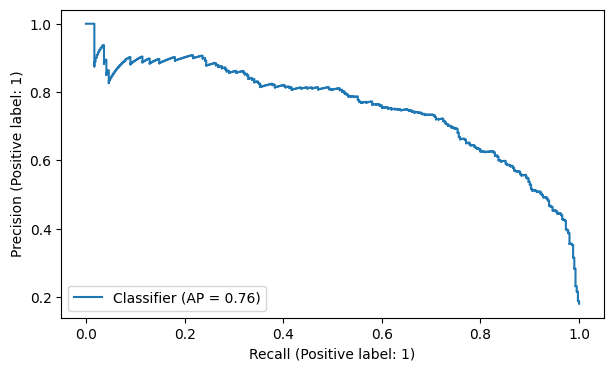

In [246]:
y_pred_proba = model3.predict(val_ds)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)

In [247]:
BERT_with_weighted_AP = average_precision_score(y_test2, y_pred_proba)
BERT_with_weighted_f1 = f1_score(y_test2, y_pred)
BERT_with_weighted_rec = recall_score(y_test2, y_pred)

### Compare Models F1 Scores, Recall Scores and Average Precision Score

In [248]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count",
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf",
                                  "Random Forest_tfidf", "AdaBoost_tfidf","DL","BERT_with_weighted"],

                        "F1_Score_Negative": [nb_count_f1_neg, log_count_f1_neg, svc_count_f1_neg,
                                             rf_count_f1_neg, ada_count_f1_neg, nb_tfidf_f1_neg, log_tfidf_f1_neg,
                                             svc_tfidf_f1_neg, rf_tfidf_f1_neg, ada_tfidf_f1_neg, DL_f1,BERT_with_weighted_f1],

                        "Recall_Score_Negative": [nb_count_rec_neg,log_count_rec_neg, svc_count_rec_neg,
                                                  rf_count_rec_neg,ada_count_rec_neg,nb_tfidf_rec_neg, log_tfidf_rec_neg,
                                                  svc_tfidf_rec_neg,rf_tfidf_rec_neg, ada_tfidf_rec_neg, DL_rec,BERT_with_weighted_rec],

                        "Average_Precision_Score_Negative": [nb_AP_neg, log_AP_neg, svc_AP_neg, rf_AP_neg,
                                                            ada_AP_neg, nb_tfidf_AP_neg, log_tfidf_AP_neg, svc_tfidf_AP_neg,
                                                            rf_tfidf_AP_neg, ada_tfidf_AP_neg, DL_AP,BERT_with_weighted_AP]})

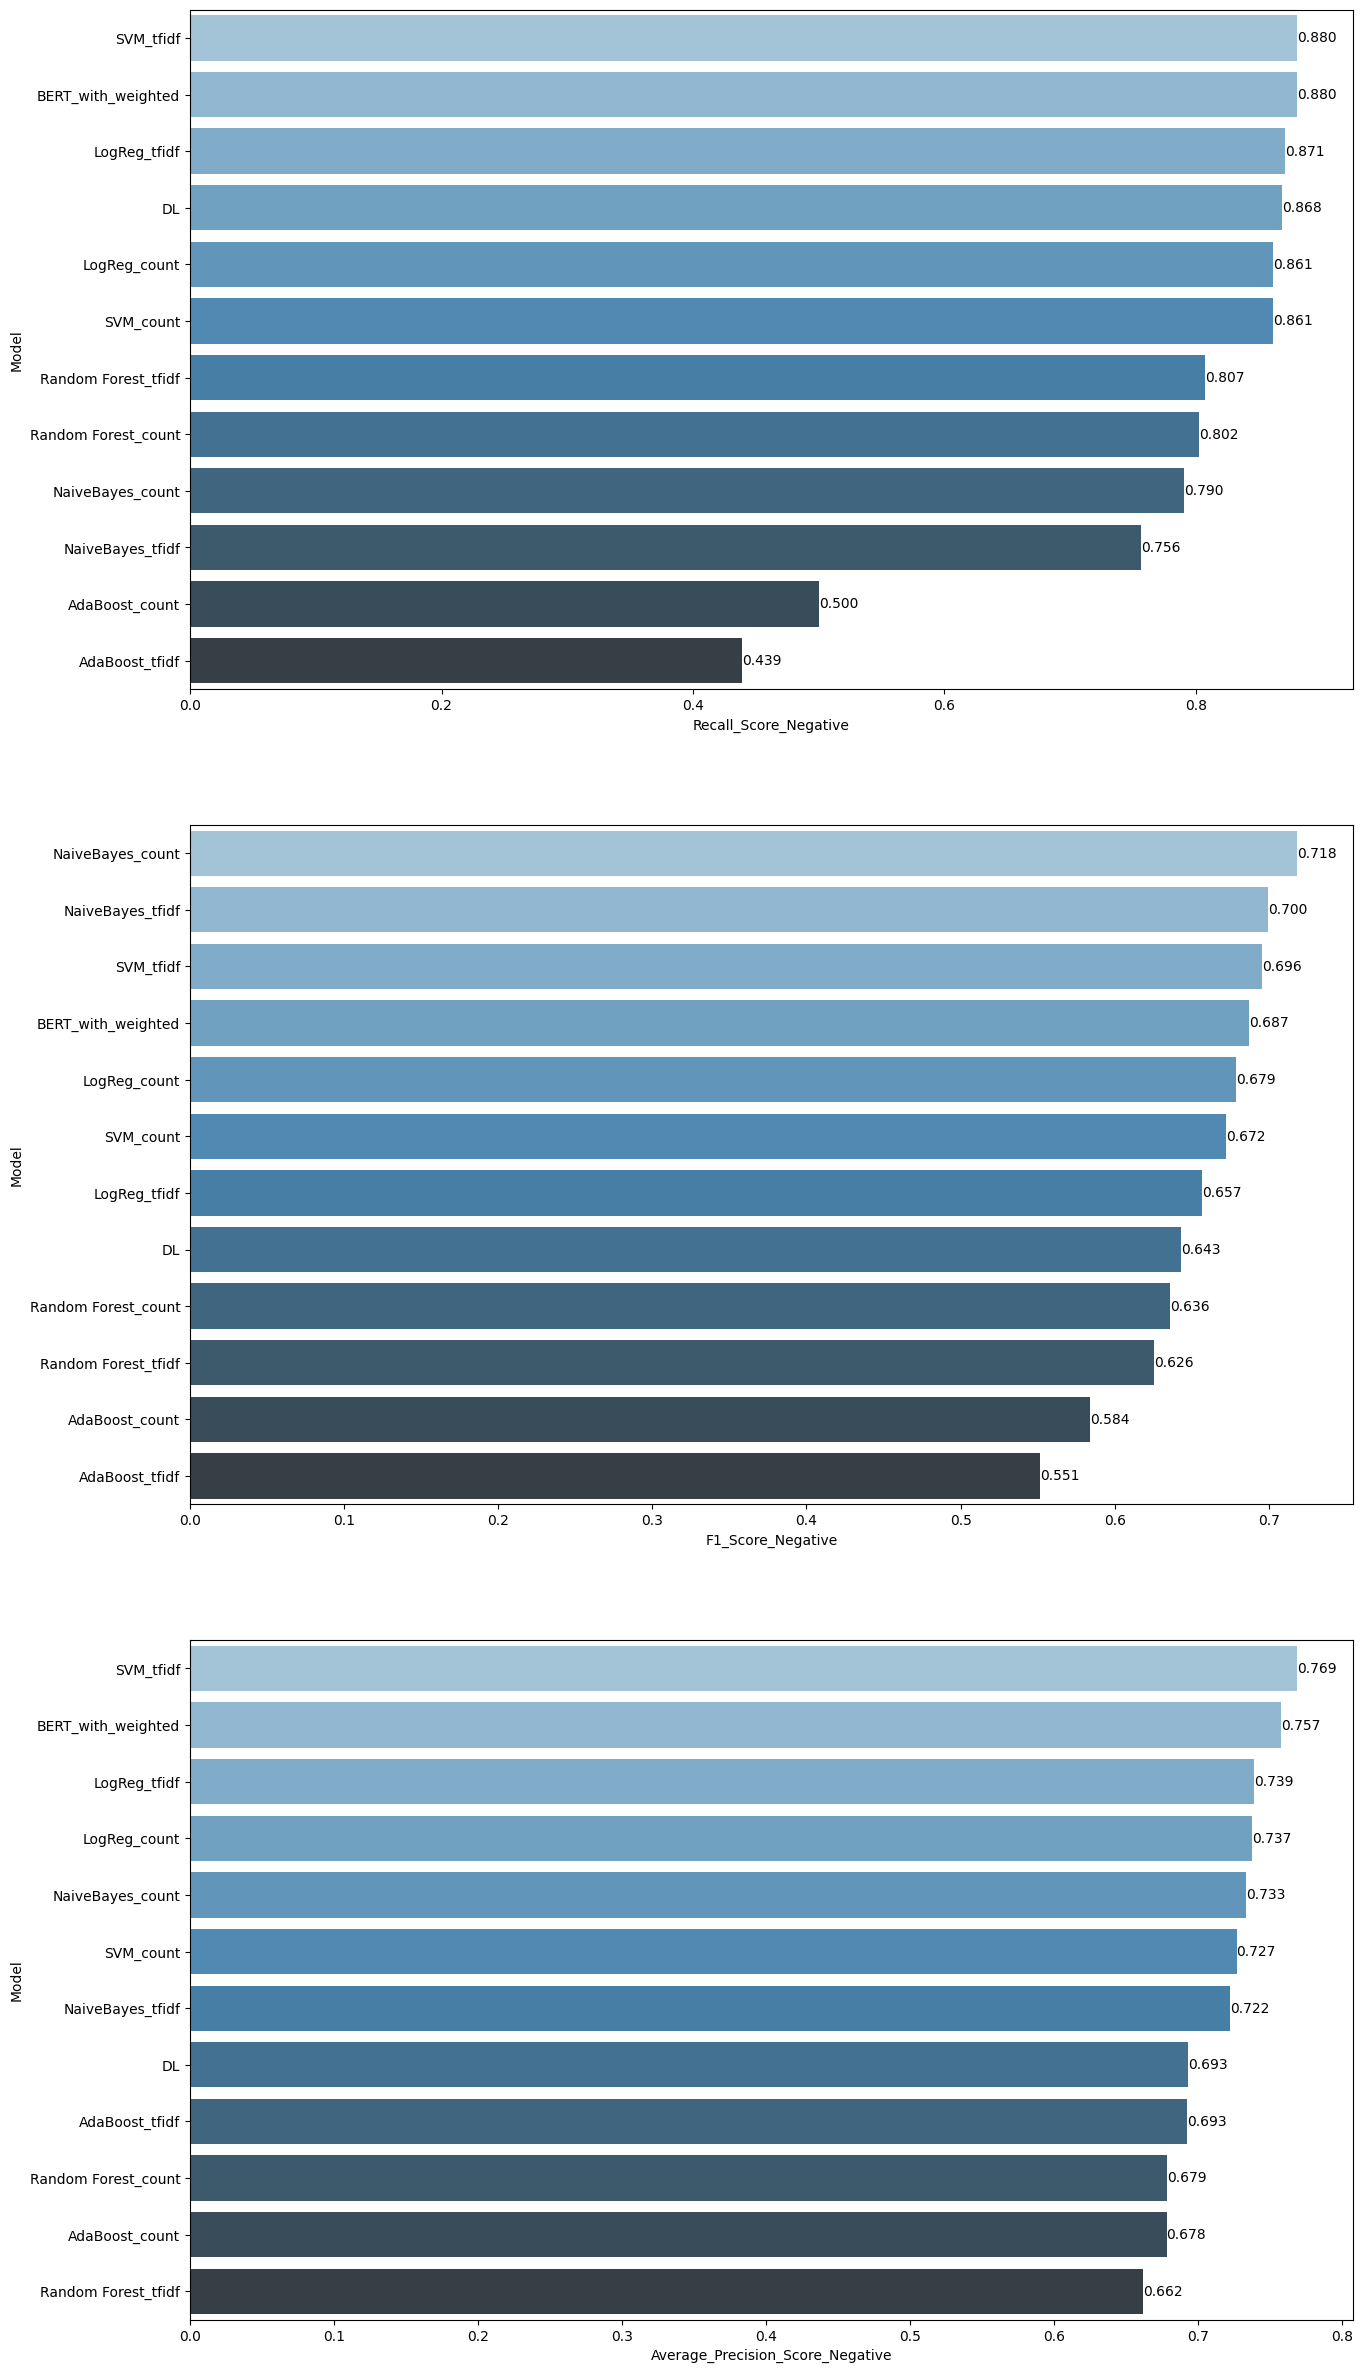

In [249]:
plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score_Negative", ascending=False)
ax=sns.barplot(x="Recall_Score_Negative", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="F1_Score_Negative", ascending=False)
ax=sns.barplot(x="F1_Score_Negative", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score_Negative", ascending=False)
ax=sns.barplot(x="Average_Precision_Score_Negative", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.show();

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___